In [1]:
import scipy.io
import os
import re
import glob
import importlib

import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns

import mat73

import utils as util
import plotting as putil
import importlib

In [2]:
%matplotlib notebook

In [3]:
putil.set_sns_style(style='dark', min_fontsize=12)

In [4]:
# rootdir = '/Volumes/Julie'
rootdir = '/mnt/giacomo'
viddir = os.path.join(rootdir, 'projector_data')
#rootdir = '/mnt/minerva/courtship-videos'
# rootdir = '/mnt/sda/Videos'
acq='20240201-1528_fly7_Dmel_sP1-ChR_3do_sh'


In [5]:
acq_dir = os.path.join(viddir, acq)
os.path.exists(viddir)

True

In [61]:
importlib.reload(util)

<module 'utils' from '/home/julianarhee/Repositories/flytracker/utils.py'>

In [62]:
calib_, trk_, feat_ = util.load_flytracker_data(acq_dir)

<IPython.core.display.Javascript object>


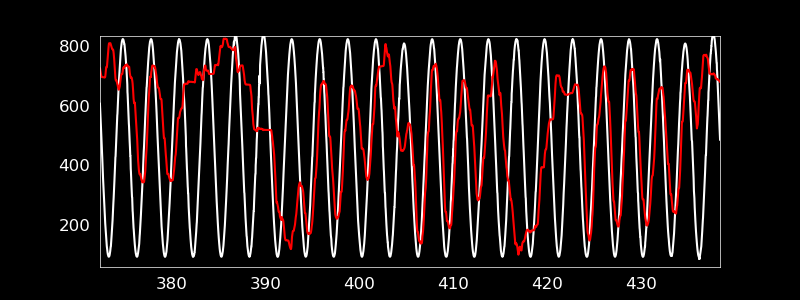

In [72]:
fig, ax = pl.subplots(figsize=(8,3))

ax.plot(trk_[trk_['id']==1]['sec'], trk_[trk_['id']==1]['pos_x'], 'w')

ax.plot(trk_[trk_['id']==0]['sec'], trk_[trk_['id']==0]['pos_x'], 'r')

In [184]:
from numpy.fft import fft, ifft, fftfreq

In [189]:
def get_fft(x, t):

    # sampling rate
    # sr = 60
    # sampling interval
    ts = np.mean(np.diff(t)) #1.0/sr
    npnts =  len(t)
    
    X = fft(x)
    N = len(X)
    n = np.arange(N)
    T = N/sr
#     freq = n/T  # freq mirrorin above nyquist
    freq = fftfreq(npnts, ts)
    
#     powerspect = 2*np.abs(X)/npnts   
    # Note: Normalized as 2*np.abs(X)/npnts instead of simply np.abs(X)
    # returns the actual amplitude values of the sine and cosine functions
    # instead of some arbitrarily-scaled values
    
    return X, freq #X, freq

In [200]:
x = trk_[trk_['id']==1]['pos_x'] - trk_[trk_['id']==1]['pos_x'].mean()
t =  trk_[trk_['id']==1]['sec'] #np.arange(0,1,ts)

# # sampling rate
# # sr = 60
# # sampling interval
# ts = np.mean(np.diff(t)) #1.0/sr

# X = fft(x)
# N = len(X)
# n = np.arange(N)
# T = N/sr
# freq = n/T 

X, freq = get_fft(x, t)

x0 = trk_[trk_['id']==0]['pos_x'] - trk_[trk_['id']==0]['pos_x'].mean()
t0 =  trk_[trk_['id']==0]['sec'] #np.arange(0,1,ts)
X0, freq0 = get_fft(x0, t0)

pwr = 2*np.abs(X)/len(t)   
pwr0 = 2*np.abs(X0)/len(t)   

target_freq = 1/3.

<IPython.core.display.Javascript object>


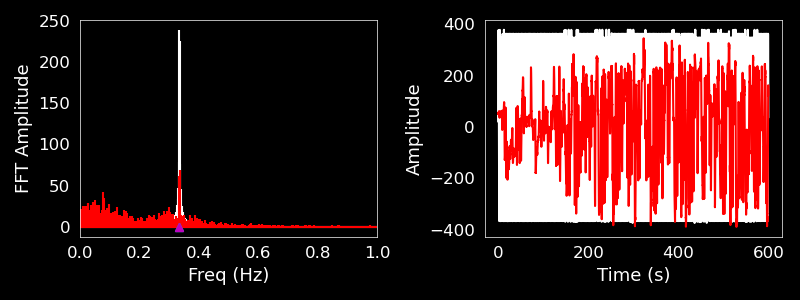

<ipython-input-203-001c5c716cdf>:4: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax.stem(freq, pwr, 'w', markerfmt=" ", basefmt="-w")
<ipython-input-203-001c5c716cdf>:5: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax.stem(freq0, pwr0, 'r', markerfmt=" ", basefmt="-r")
/home/julianarhee/anaconda3/envs/flytracker/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/julianarhee/anaconda3/envs/flytracker/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [203]:

fig, axn = pl.subplots(1, 2, figsize = (8, 3))
# pl.subplot(121)
ax=axn[0]
ax.stem(freq, pwr, 'w', markerfmt=" ", basefmt="-w")
ax.stem(freq0, pwr0, 'r', markerfmt=" ", basefmt="-r")
# label
ax.set_xlabel('Freq (Hz)')
ax.set_ylabel('FFT Amplitude') #|X(freq)|')
ax.set_xlim(0, 1)

# show max
target_ix = np.argmin(abs(freq-target_freq))
max_ix = np.argmax(X0) 
ax.plot(freq[target_ix], 0, 'c^') #', max_ix
ax.plot(freq[max_ix], 0, 'm^') #', max_ix

ax=axn[1]
ax.plot(t, ifft(X), 'w')
ax.plot(t, ifft(X0), 'r')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
pl.tight_layout()
# plt.show()

In [194]:
target_freq = 1/3.
target_ix = np.argmin(abs(freq-target_freq))
max_ix = np.argmax(X0) 
target_ix, max_ix

(200, 200)

In [199]:
freq[200]

0.33333333333333337

In [195]:
fq = np.fft.fftfreq(len(x))
fq.min(), fq.max()

(-0.5, 0.49997222222222226)

In [196]:
freq.max()

29.998333333333335

In [197]:
fq[200]

0.005555555555555556